# Load Patterning & Envelopes

This notebook demonstrates the use of `PyCBA` for constructing load effect envelopes from patterned loading. The `LoadPattern` class is used to calculate the design envelopes from load patterning dead and live loads. The load factors corresponding to the maximum and minimum values of the nominal loads are supplied, along with the "load matrices" for dead and live load.

In [1]:
import pycba as cba
import numpy as np
import matplotlib.pyplot as plt

## Example 1: Hulse & Mosley
Here we consider a 3-span beam from Hulse & Mosley, *Reinforced Concrete Design By Computer* (1986) which uses the load pattern from the (now superseded) British Standards:
- MAX = 1.4 Gk + 1.6 Qk 
- MIN = 1.0 Gk
The beam is subjected to nominal dead and live UDLs of $w_g = 25$ kN/m and $w_q = 10$ kN/m respectively.

First establish the beam as usual:

In [2]:
L = [6,4,6]
EI = 30 * 10e9 * 1e-6
R = [-1,0,-1,0,-1,0,-1,0]
beam_analysis = cba.BeamAnalysis(L, EI, R)

Now set the dead load matrix and maximum and minimum load factors:

In [3]:
LMg = [[1,1,25,0,0],
       [2,1,25,0,0],
       [3,1,25,0,0]]
γg_max = 1.4
γg_min = 1.0

And the same for the live load:

In [4]:
LMq = [[1,1,10,0,0],
       [2,1,10,0,0],
       [3,1,10,0,0]]
γq_max = 1.6
γq_min = 0

Now create the `LoadPattern` object by passing the `BeamAnalysis` object. Assign the dead and live load information and then analyze and plot.

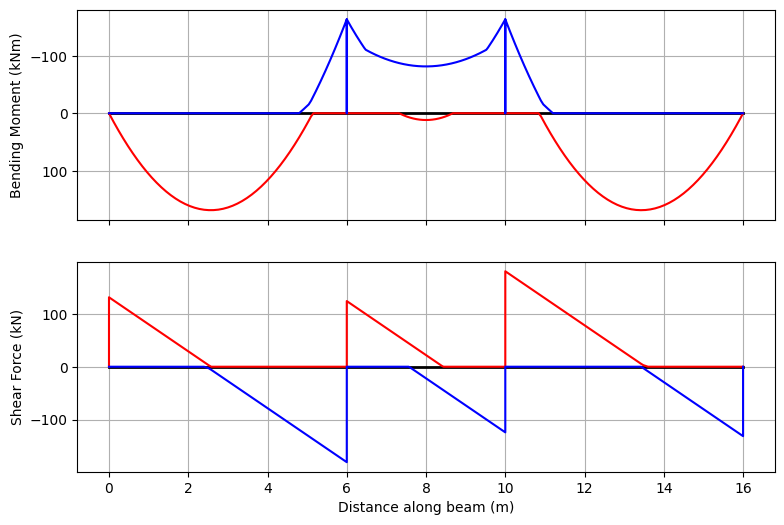

In [5]:
lp = cba.LoadPattern(beam_analysis)
lp.set_dead_loads(LMg,γg_max,γg_min)
lp.set_live_loads(LMq,γq_max,γq_min)
env = lp.analyze()
env.plot(figsize=(9,6));

And let's confirm that the results match the book (Section 2.3.6) to the second decimal place (`atol=1e-2`). To do this, we find the results from our analysis for key locations for moments and shears and confirm they match the book. First, the moments:

In [6]:
m_locs = np.array([3, 6, 8, 10, 13])
idx = [(np.abs(env.x - x)).argmin() for x in m_locs]
mmx = np.allclose(env.Mmax[idx],np.array([163.79, 0, 11.75, 0, 163.79]),atol=1e-2)
mmn = np.allclose(env.Mmin[idx],np.array([0, -163.38, -81.42, -163.38, 0]),atol=1e-2)
print(mmx,mmn)

True True


The shear is a little more complex because of the way load effects are calculated along the beam. For $n$ points requested (e.g. 100), there are nominally $n+1$ points to include the start and end. However, because we also want to 'close' the shear force diagram (see above), we include two more duplicated points at the end, so there are $n+3$ points per span; and we want to extract the maximum and minium shear forces along each span, and not including these end points.

In [7]:
n = beam_analysis.beam_results.npts
nspans = beam_analysis.beam.no_spans
Vmax = np.array([np.max(env.Vmax[i*(n+3):(i+1)*(n+3)]) for i in range(nspans)])
vmx = np.allclose(Vmax,np.array([131.1, 123.94, 180.23]),atol=1e-2)
Vmin = np.array([np.min(env.Vmin[i*(n+3):(i+1)*(n+3)]) for i in range(nspans)])
vmn = np.allclose(Vmin,np.array([-180.23, -123.94, -131.10]),atol=1e-2)
print(vmx,vmn)

True True


## Example 2: 5-span Beam
In this example we use Eurocode load factors for which the load pattern is
- MAX = 1.35 Gk + 1.5Qk 
- MIN = 0.9 Gk

Make the beam as before:

In [8]:
L = [6.5,8.3,8.3,8.3,6.5]
EI = 30 * 10e9 * 1e-6
R = [-1,0,-1,0,-1,0,-1,0,-1,0,-1,0]
beam_analysis = cba.BeamAnalysis(L, EI, R)

And define the loads:

In [9]:
LMg = [[1,1,10.3,0,0],
       [2,1,10.3,0,0],
       [3,1,10.3,0,0],
       [4,1,10.3,0,0],
       [5,1,10.3,0,0]]
γg_max = 1.35
γg_min = 0.9

LMq = [[1,1,12.5,0,0],
       [2,1,12.5,0,0],
       [3,1,12.5,0,0],
       [4,1,12.5,0,0],
       [5,1,12.5,0,0]]
γq_max = 1.5
γq_min = 0

And now automatically pattern as before. However, in this case, we desire to calculate the load effects at 200 pts along each span.

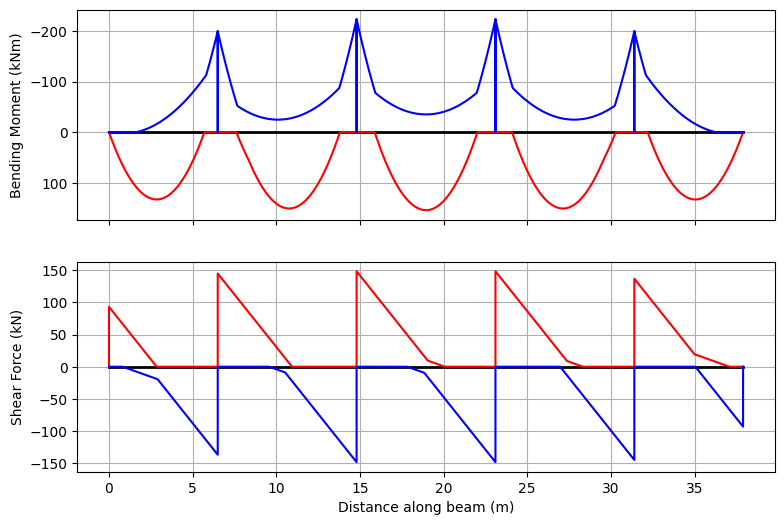

In [10]:
lp = cba.LoadPattern(beam_analysis)
lp.set_dead_loads(LMg,γg_max,γg_min)
lp.set_live_loads(LMq,γq_max,γq_min)
env = lp.analyze(npts=200)
env.plot(figsize=(9,6));

We can also choose to plot each bending moment and shear force diagram in the envelope:

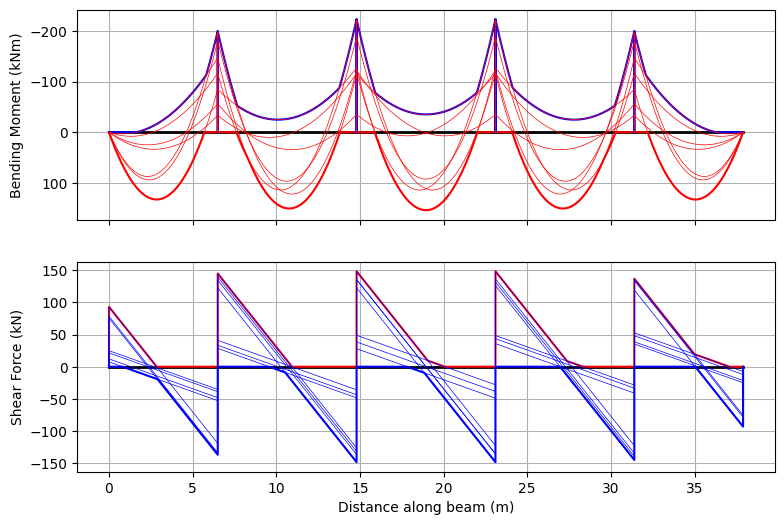

In [11]:
env.plot(each=True,figsize=(9,6));

## Example 3: 4-Span Beam
Here we consider a 4-span beam subjec to nominal dead and live UDLs of $w_g = 20$ kN/m and $w_q = 30$ kN/m respectively. Here we use a modified load pattern from the old British Standards, conservatively allowing dead load to be less than the nominal estimate: 
- MAX = 1.4 Gk + 1.6 Qk 
- MIN = 0.9 Gk

In [12]:
L = [6,8,6,8]
EI = 30 * 10e9 * 1e-6
R = [-1,0,-1,0,-1,0,-1,0,-1,0]
beam_analysis = cba.BeamAnalysis(L, EI, R)

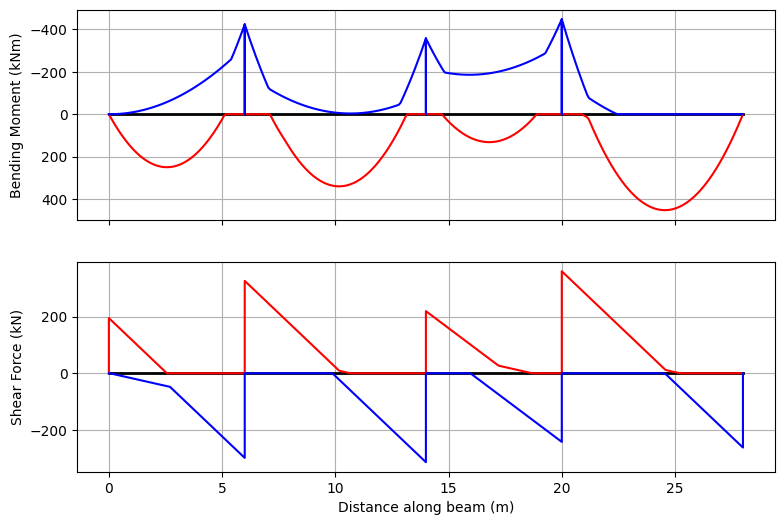

In [13]:
LMg = [[1,1,20,0,0],
       [2,1,20,0,0],
       [3,1,20,0,0],
       [4,1,20,0,0]]
γg_max = 1.4
γg_min = 0.9

LMq = [[1,1,30,0,0],
       [2,1,30,0,0],
       [3,1,20,0,0],
       [4,1,30,0,0]]
γq_max = 1.6
γq_min = 0

lp = cba.LoadPattern(beam_analysis)
lp.set_dead_loads(LMg,γg_max,γg_min)
lp.set_live_loads(LMq,γq_max,γq_min)
env_udl = lp.analyze()
env_udl.plot(figsize=(9,6));

## Example 4: Augmenting Envelopes
Here we augment an envelope due to a moving vehicle to the 4-span beam just considered, illustrating that mixed analyses are possible.

The vehicle used is from the Australian bridge design standard, AS5100.2, M1600, with a 6.25~m axle spacing.

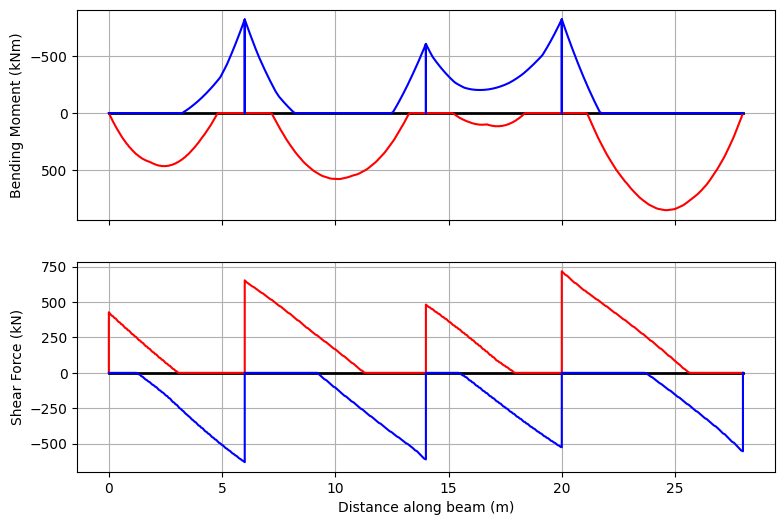

In [14]:
vehicle = cba.VehicleLibrary.get_m1600(6.25)
bridge_analysis = cba.BridgeAnalysis(beam_analysis, vehicle)
env_veh = bridge_analysis.run_vehicle(0.1)
env_veh.plot(figsize=(9,6));

Next, establish the envelope of envelopes, and augment both in, then plot:

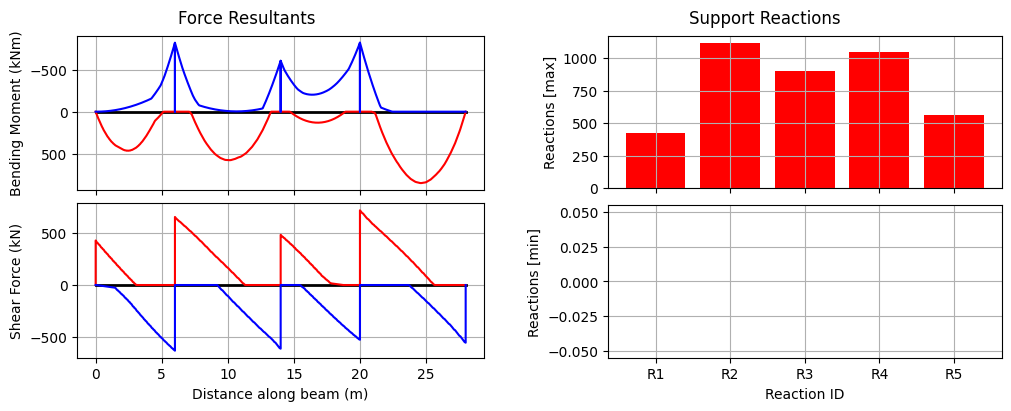

In [15]:
envenv = cba.Envelopes.zero_like(env_udl)
envenv.augment(env_udl)
envenv.augment(env_veh)
bridge_analysis.plot_envelopes(envenv)

## Example 5: Sum Envelopes
Here we sum multiple envelopes of a pre-patterned static analysis and a moving load analysis to a 3-span beam.

The following loads are considered:
- Dead load (gravity);
- Permanent load (super imposed dead load);
- Snow load (live load) as a uniform distributed load;
- Traffic load (live load) as concentrated loads.

For this example, a vehicle load model is considered according to Eurocode - Load Model 1. For the purpose of this example, only concentrated loads representing the vehicle axis are considered, while distributed load associated to the traffic load is neglected. In addition, any partial coefficient due to the concomitant action of snow and traffic load is neglected.

The width of carriageway is equal to 9.00 m, so 3 full lanes (3 vehicles in transversal direction) are considered.


In [16]:
L = [30,30,30]
EI = 30 * 10e9 * 1e-6
R = [-1,0,-1,0,-1,0,-1,0]
beam_analysis = cba.BeamAnalysis(L, EI, R)

Both gravity and permanent loads are considered for the analysis, so a pre-combination of load matrix is performed to obtain a LMd (load matrix of dead loads).

A load matrix representing the live load of snow is considered (q_snow=1.50 kN/m^2, so a UDL of 1.50 kN/m^2 * 9.00 m =  13.5 kN/m is used).

In [17]:
LMg = [[1,1,12.5,0,0],
       [2,1,12.5,0,0],
       [3,1,12.5,0,0]]
γg_max = 1.35
γg_min = 1.0

LMp = [[1,1,50,0,0],
       [2,1,50,0,0],
       [3,1,50,0,0]]
γp_max = 1.5
γp_min = 1.0

LMd = []
for count, load in enumerate(LMg):
    sum_load = LMg[count][2] * γg_max + LMp[count][2] * γp_max
    span_vector = [LMg[count][0], LMg[count][1], sum_load, LMg[count][3], LMg[count][4]]
    LMd.append(span_vector)
γd_max = 1.0
γd_min = 1.0

LMq = [[1,1,13.5,0,0],
       [2,1,13.5,0,0],
       [3,1,13.5,0,0]]
γq_max = 1.50
γq_min = 0

We first analyze dead loads and UDL live load with `LoadPattern`:

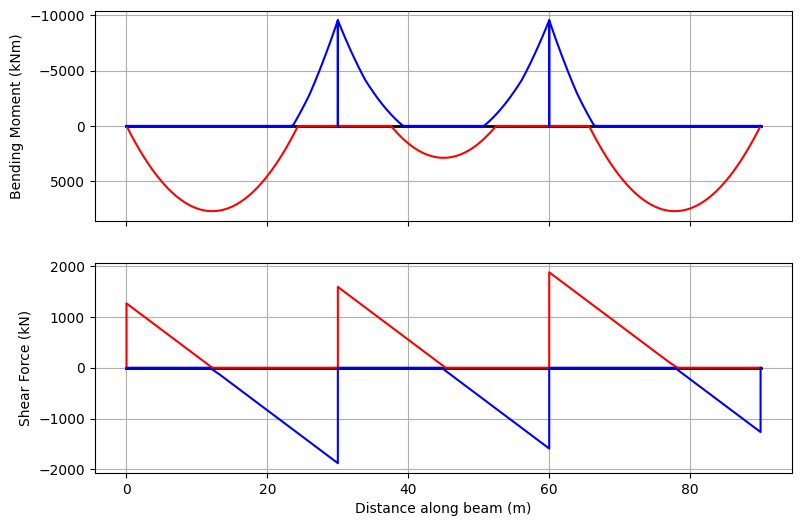

In [18]:
lp = cba.LoadPattern(beam_analysis)
lp.set_dead_loads(LMd,γd_max,γd_min)
lp.set_live_loads(LMq,γq_max,γq_min)
env_udl = lp.analyze()
env_udl.plot(figsize=(9,6));

Then a `Vehicle` is defined (2 axis vehicle, with 600 kN per axle and spacing of 1.20 m) and an envelope with `BridgeAnalysis` is performed:

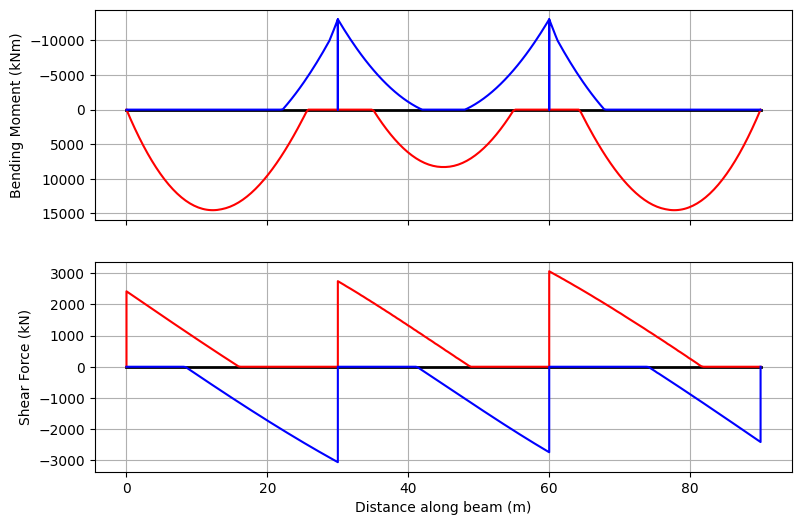

In [19]:
vehicle_weights = [600, 600]
vehicle_spacing = [1.20]
vehicle_weights_fact = []
γq_max_traffic = 1.35
for load in vehicle_weights:
    factored = load * γq_max_traffic
    vehicle_weights_fact.append(factored)
    
vehicle = cba.Vehicle(vehicle_spacing, vehicle_weights)
bridge_analysis = cba.BridgeAnalysis(beam_analysis, vehicle)
env_veh = bridge_analysis.run_vehicle(0.1)
env_veh.plot(figsize=(9,6));

Now that we have the two envelopes that we want to sum, we can perform a linear superposition with the `sum` method and plot the results:

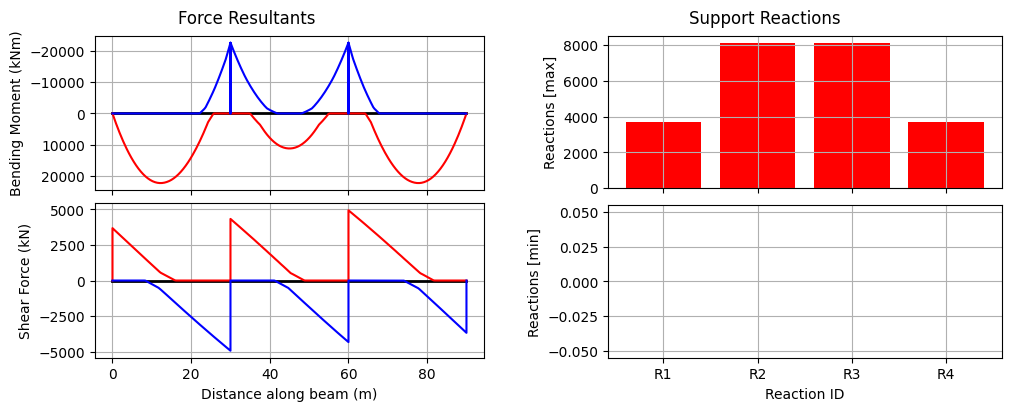

In [20]:
sumenv = cba.Envelopes.zero_like(env_udl)
sumenv.sum(env_udl)
sumenv.sum(env_veh)
bridge_analysis.plot_envelopes(sumenv)

A plot of just bending moment and shear force can be shown with:

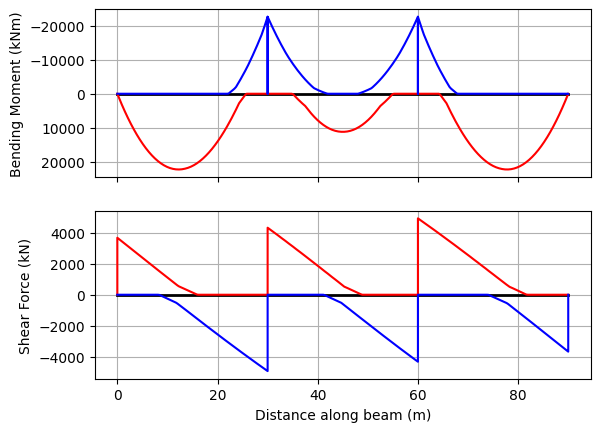

In [32]:
plot = sumenv.plot()

A numerical control of the results is carried out for the span number 1:

In [22]:
x_axis = sumenv.x

#Single envelopes results:
envudl_mmax = env_udl.Mmax
envudl_mmin = env_udl.Mmin

envveh_mmax = env_veh.Mmax
envveh_mmin = env_veh.Mmin

results_envudl_max = envudl_mmax[(0 <= x_axis) & (x_axis <= 10)]
results_envudl_min = envudl_mmin[(0 <= x_axis) & (x_axis <= 10)]

results_envveh_max = envveh_mmax[(0 <= x_axis) & (x_axis <= 10)]
results_envveh_min = envveh_mmin[(0 <= x_axis) & (x_axis <= 10)]

#Sum of envelopes results:
sumenv_mmax = sumenv.Mmax
sumenv_mmin = sumenv.Mmin

results_sumenv_max = sumenv_mmax[(0 <= x_axis) & (x_axis <= 10)]
results_sumenv_min = sumenv_mmin[(0 <= x_axis) & (x_axis <= 10)]

print(
results_sumenv_max.max(),
results_sumenv_min.min()
)

print(
results_envudl_max.max()+results_envveh_max.max(),
results_envudl_min.min()+results_envveh_min.min()
)

21451.63581 -1.8189894035458565e-12
21451.63581 -1.8189894035458565e-12


## Example 6: UK Bridge Assessment Code CS454

This example merges `pycba` capabilities in influence lines, bridge analysis, and envelopes.

### Background

The intensity of the traffic loading for model 2 in CS454 is dependent on the loaded length (CS454 Table 5.19a). The loaded length is defined as:

> The length of the structure that is loaded with traffic in the assessment of load effects, determined from the adverse areas of the influence line for the effect being evaluated.

Therefore, we need to envelope many possible live load arrangements to get the most onerous effects. To simplify the problem we will either apply loading to the the full length of a span or not at all. This pragmatic approach may not produce the most analytically onerous effect but will be very close.

Consider a long continuous bridge beam with many equal spans of 12m. We will analyse a sample of the spans (6) to identify the worst load effects. 

In [23]:
span = 12
L = 6*[span]
R = 7*[-1, 0]
EI = 210* 900* 1e-6

### Influence Lines

First lets plot the influence lines for:
* Hogging at the support between spans 3,4 (36m)
* Sagging at the midspan of span 3 (30m)
* Shear force at the support between spans 3,4 (36m)

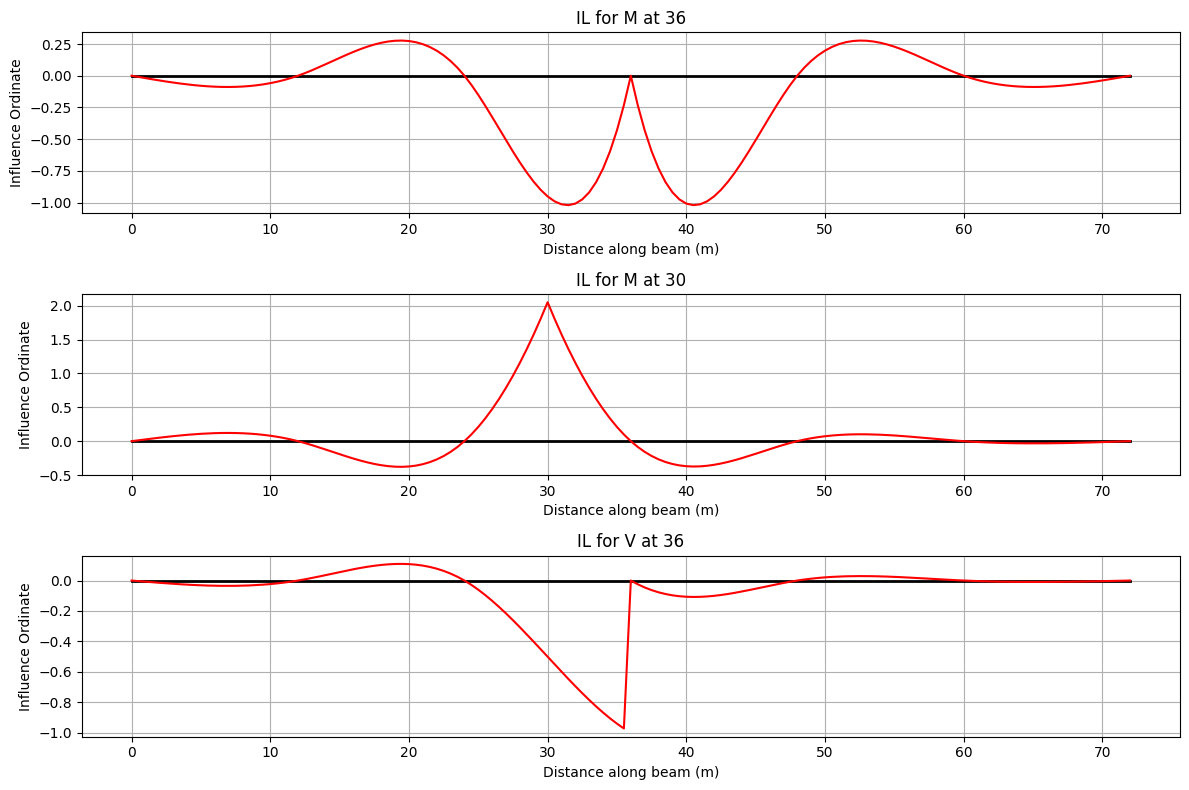

In [24]:
ils = cba.InfluenceLines(L, EI, R)
ils.create_ils(step=0.5)
il_V = ils.get_il(36,'V')
il_M_hog = ils.get_il(36, 'M')
fig, axs  = plt.subplots(nrows=3, ncols=1,figsize=(12,8))
ils.plot_il(36, 'M', axs[0])
ils.plot_il(30, 'M',axs[1])
ils.plot_il(36, 'V' ,axs[2]);

It can be seen from the IL diagrams that:

* To create the largest shear force the KEL should be placed at 36 m and the UDL placed in span 3&4 or spans 1,3,4,6
* To create the largest hogging moment the KEL should be placed at the centre of either spans 3,4 and the  UDL should be cover spans 3,4 or 1,3,4,6
* To create the largest sagging moment the KEL should be placed span 3 and the UDL in span 3 or 1,3,5. 


### Loading

The loaded lengths covering one to four spans are then:

In [25]:
loaded_lengths = span*np.array(range(1,5))

CS454 defines the two forms of loading (a UDL and a Knife Edge Load (KEL)) as a function of loaded length, as follows

| Loaded length, $L$ (m) | UDL (kN/m)                                 | KEL (kN)                  |
| --- | --- | --- |
| $L \le 20$          | $\frac{230}{L^{0.67}}$                      | 82                        |
| $20 < L < 40$       | $\frac{336}{L^{0.67}}\frac{1}{1.92-0.023L}$ | $\frac{120}{1.92-0.023L}$ |
| $40 \le L \le 50$   | $\frac{336}{L^{0.67}}$                      | 120                       |
| $L > 50$            | $\frac{36}{L^{0.1}}$                        | 120                       |

Let's write a function to return these values:

In [26]:
def cs454(L):
    # default to L > 50 m
    udl = 36/L**0.1
    kel = 120
    if L <= 20.0:
        udl = 230/L**0.67
        kel = 82
    elif L > 20 and L < 40:
        udl = (336/L**0.67)*(1/(1.92-0.023*L))
        kel = 120/(1.92-0.023*L)
    elif L >= 40 and L <= 50:
        udl = 336/L**0.67
        kel = 120
    return udl,kel

In [27]:
UDL = []
KEL = []
for ll in loaded_lengths:
    udl,kel = cs454(ll)
    UDL.append(udl)
    KEL.append(kel)

We will now define a load model for dead load and multiple load models for the various live loading cases using list comprehension. For dead load we will consider a 10kN/m load. 

Note that we are using the low level `LoadMatrix` object of `PyCBA` to assemble the loadings for each loadcase.

In [28]:
#Add DL
LMg = [[s, 1 ,10,0,0] for s in range(1,7)]
           
#Live Loading - Create multiple load matrices for live load

# Load cases for sagging
LMs1 = ([[i, 1 ,UDL[0],0,0] for i in [4]] + [[i, 2 ,KEL[0],L[i]/2,0] for i in [4]])
LMs3 = ([[i, 1 ,UDL[2],0,0] for i in [2,4,6]] + [[i, 2 ,KEL[2],L[i]/2,0] for i in [4]])

# Load cases for hogging
LMh2 = ([[i, 1 ,UDL[1],0,0] for i in [3,4]] + [[i, 2 ,KEL[1],L[i]/2,0] for i in [4]])
LMh4 = ([[i, 1 ,UDL[3],0,0] for i in [1,3,4,6]] + [[i, 2 ,KEL[3],L[i]/2,0] for i in [4]])

# Load cases for shear force
LMsf2 = ([[i, 1 ,UDL[1],0,0] for i in [3,4]] + [[i, 2 ,KEL[1],0,0] for i in [4]])
LMsf4 = ([[i, 1 ,UDL[3],0,0] for i in [1,3,4,6]] + [[i, 2 ,KEL[3],0,0] for i in [4]])

LMq = [LMs1, LMs3, LMh2, LMh4, LMsf2, LMsf4]

Let's set the load factors for dead and live load:

In [29]:
γg = 1.2
γq = 1.35

Then we set up the analysis, factoring the `LoadMatrix` objects (`factor_LM`), and adding them (`add_LM`), storing the `BeamResults` outputs in a list. 

In [30]:
beam_analysis = cba.BeamAnalysis(L, EI, R)
gLMg = cba.factor_LM(LMg,γg)

br = []
for i in range(len(LMq)):
    gLMqi = cba.factor_LM(LMq[i],γq)
    LM = cba.add_LM(gLMg,gLMqi)
    beam_analysis.set_loads(LM)
    beam_analysis.analyze()
    br.append(beam_analysis.beam_results)    

Finally, from the list of `BeamResults` objects, we create the envelope and plot the results:

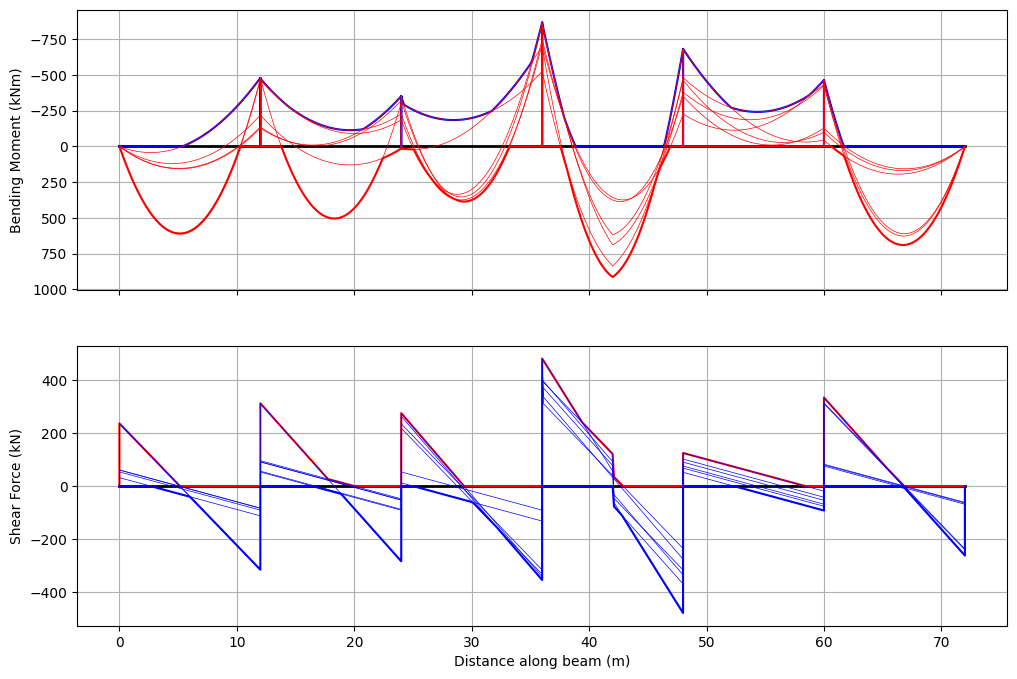

In [31]:
env = cba.Envelopes(br)
env.plot(each=True, figsize=(12,8));